In [158]:
import requests as r
import time
from datetime import datetime
import pandas as pd
import json
baseurl = "https://www.nseindia.com/"
url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050'''

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, '
                         'like Gecko) '
                         'Chrome/80.0.3987.149 Safari/537.36',
           'accept-language': 'en,gu;q=0.9,hi;q=0.8', 'accept-encoding': 'gzip, deflate, br'}


session = r.Session()
request_data = session.get(baseurl,headers=headers,timeout=5)
cook = request_data.cookies
r = session.get(url, headers=headers, timeout=5, cookies=cook)
dict_data = r.json()

if len(dict_data)>0:
    print('Success')
else:
    print('Failed!!')

Success


In [15]:
print(dict_data)

{'name': 'NIFTY 50', 'advance': {'declines': '27', 'advances': '23', 'unchanged': '0'}, 'timestamp': '03-Sep-2024 11:36:54', 'data': [{'priority': 1, 'symbol': 'NIFTY 50', 'identifier': 'NIFTY 50', 'open': 25313.4, 'dayHigh': 25321.7, 'dayLow': 25235.8, 'lastPrice': 25260.8, 'previousClose': 25278.7, 'change': -17.900000000001455, 'pChange': -0.07, 'ffmc': 1118500366.86, 'yearHigh': 25333.65, 'yearLow': 18837.85, 'totalTradedVolume': 72972608, 'totalTradedValue': 89800410358.72, 'lastUpdateTime': '03-Sep-2024 11:36:54', 'nearWKH': 0.28756219494625596, 'nearWKL': -34.09598229097271, 'perChange365d': 29.85, 'date365dAgo': '01-Sep-2023', 'chart365dPath': 'https://nsearchives.nseindia.com/365d/NIFTY-50.svg', 'date30dAgo': '02-Aug-2024', 'perChange30d': 2.1, 'chart30dPath': 'https://nsearchives.nseindia.com/30d/NIFTY-50.svg', 'chartTodayPath': 'https://nsearchives.nseindia.com/today/NIFTY-50.svg'}, {'priority': 0, 'symbol': 'NESTLEIND', 'identifier': 'NESTLEINDEQN', 'series': 'EQ', 'open': 

In [16]:
dict_data.keys()

dict_keys(['name', 'advance', 'timestamp', 'data', 'metadata', 'marketStatus', 'date30dAgo', 'date365dAgo'])

In [17]:
dict_data['metadata']

{'indexName': 'NIFTY 50',
 'open': 25313.4,
 'high': 25321.7,
 'low': 25235.8,
 'previousClose': 25278.7,
 'last': 25260.8,
 'percChange': -0.07,
 'change': -17.900000000001455,
 'timeVal': '03-Sep-2024 17:06:30',
 'yearHigh': 25333.65,
 'yearLow': 18837.85,
 'totalTradedVolume': 72972608,
 'totalTradedValue': 89800410358.72,
 'ffmc_sum': 1118500366.86}

In [24]:
for i in dict_data['data']:
    print(i.keys())

dict_keys(['priority', 'symbol', 'identifier', 'open', 'dayHigh', 'dayLow', 'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh', 'yearLow', 'totalTradedVolume', 'totalTradedValue', 'lastUpdateTime', 'nearWKH', 'nearWKL', 'perChange365d', 'date365dAgo', 'chart365dPath', 'date30dAgo', 'perChange30d', 'chart30dPath', 'chartTodayPath'])
dict_keys(['priority', 'symbol', 'identifier', 'series', 'open', 'dayHigh', 'dayLow', 'lastPrice', 'previousClose', 'change', 'pChange', 'totalTradedVolume', 'totalTradedValue', 'lastUpdateTime', 'yearHigh', 'ffmc', 'yearLow', 'nearWKH', 'nearWKL', 'perChange365d', 'date365dAgo', 'chart365dPath', 'date30dAgo', 'perChange30d', 'chart30dPath', 'chartTodayPath', 'meta'])
dict_keys(['priority', 'symbol', 'identifier', 'series', 'open', 'dayHigh', 'dayLow', 'lastPrice', 'previousClose', 'change', 'pChange', 'totalTradedVolume', 'totalTradedValue', 'lastUpdateTime', 'yearHigh', 'ffmc', 'yearLow', 'nearWKH', 'nearWKL', 'perChange365d', 'date365dA

In [ ]:
[{'name':'Mohan'},{'Stock':'Hdfc'}]

In [27]:
# table = pd.DataFrame()

In [28]:
all_data = pd.DataFrame(dict_data['data'])

In [30]:
all_data.columns

Index(['priority', 'symbol', 'identifier', 'open', 'dayHigh', 'dayLow',
       'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh',
       'yearLow', 'totalTradedVolume', 'totalTradedValue', 'lastUpdateTime',
       'nearWKH', 'nearWKL', 'perChange365d', 'date365dAgo', 'chart365dPath',
       'date30dAgo', 'perChange30d', 'chart30dPath', 'chartTodayPath',
       'series', 'meta'],
      dtype='object')

In [35]:
required_columns = ['lastUpdateTime','symbol', 'open', 'dayHigh', 'dayLow',
       'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh',
       'yearLow']

In [38]:
nifty_50_data = all_data[required_columns]

In [40]:
nifty_50_data.describe()

,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000
mean,3447.002745,3460.400980,3425.136667,3442.716275,3443.969216,-1.252941,-0.008627,2.193160e+12,3602.458627,2410.659608
std,4262.147301,4265.605988,4239.980713,4251.529893,4256.601390,23.948182,0.553711,2.488207e+12,4355.744074,3101.615234
min,152.840000,153.450000,152.170000,152.280000,152.880000,-127.050000,-1.710000,1.118500e+09,184.600000,114.600000
25%,1142.800000,1145.325000,1132.100000,1135.000000,1140.725000,-5.125000,-0.305000,8.483859e+11,1217.720000,738.750000
50%,1850.000000,1854.800000,1817.600000,1831.300000,1840.550000,-0.850000,-0.070000,1.239335e+12,1905.950000,1363.550000
75%,4107.500000,4117.200000,4081.400000,4098.325000,4102.075000,6.500000,0.255000,2.289197e+12,4256.075000,2986.250000
max,25313.400000,25321.700000,25235.800000,25260.800000,25278.700000,62.550000,1.300000,1.229011e+13,25333.650000,18837.850000


<Axes: xlabel='symbol'>

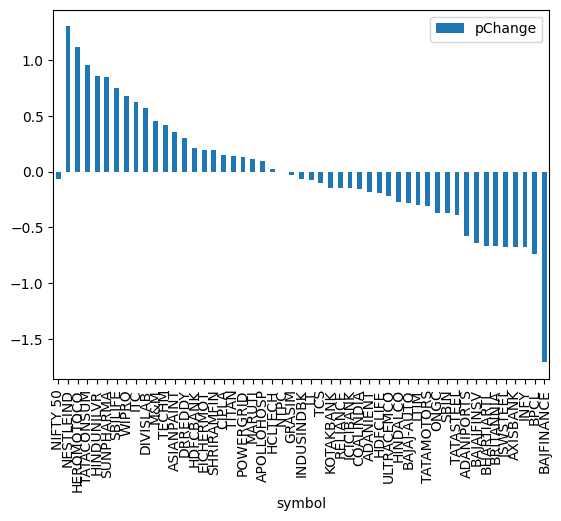

In [42]:
nifty_50_data.plot(x = 'symbol',y = 'pChange',kind = 'bar')

In [46]:
nifty_50 = nifty_50_data.iloc[1:,:]

<Axes: xlabel='symbol'>

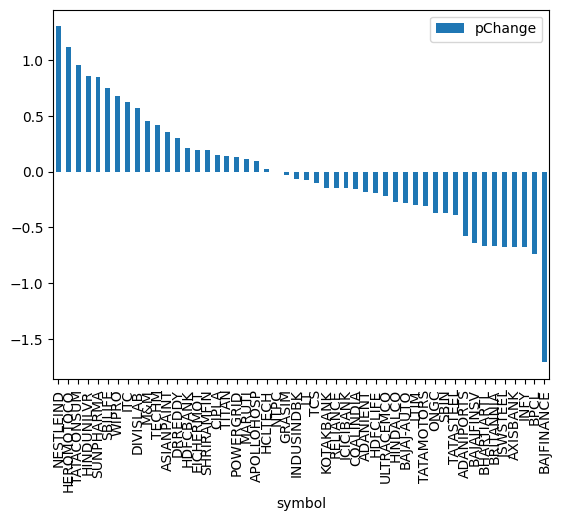

In [47]:
nifty_50.plot(x = 'symbol',y = 'pChange',kind = 'bar')

In [48]:
import matplotlib.pyplot as plt

In [66]:
positive_stocks = nifty_50[nifty_50['pChange']>0]
negative_stocks = nifty_50[nifty_50['pChange']<0]

'03-Sep-2024 11:37:53'

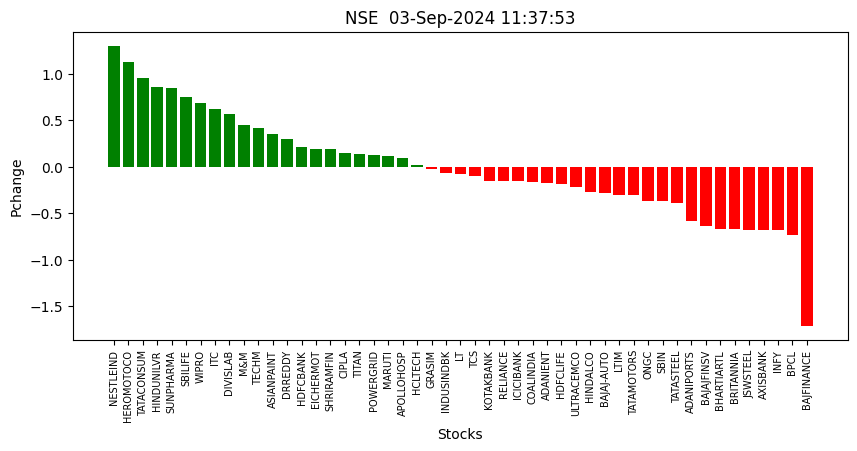

In [75]:
plt.figure(figsize=(10,4))
plt.bar(x = positive_stocks['symbol'],height=  positive_stocks['pChange'],color = 'g')
plt.bar(x = negative_stocks['symbol'],height=  negative_stocks['pChange'],color = 'r')

plt.xticks(rotation = 90,fontsize = 7)
plt.xlabel('Stocks')
plt.ylabel('Pchange')
plt.title(f"NSE  {nifty_50['lastUpdateTime'].max()}")
plt.show()

In [1]:
def scrap_nifty():
    import requests as r
    import time
    from datetime import datetime
    import pandas as pd
    import json
    import matplotlib.pyplot as plt
    baseurl = "https://www.nseindia.com/"
    url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050'''
#     url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20MIDCAP%20100'''

#     url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20500'''

    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, '
                             'like Gecko) '
                             'Chrome/80.0.3987.149 Safari/537.36',
               'accept-language': 'en,gu;q=0.9,hi;q=0.8', 'accept-encoding': 'gzip, deflate, br'}


    session = r.Session()
    request_data = session.get(baseurl,headers=headers,timeout=5)
    cook = request_data.cookies
    r = session.get(url, headers=headers, timeout=5, cookies=cook)
    dict_data = r.json()

    if len(dict_data)>0:
        print('Success')
    else:
        print('Failed!!')
    
    
    all_data = pd.DataFrame(dict_data['data'])
    required_columns = ['lastUpdateTime','symbol', 'open', 'dayHigh', 'dayLow',
       'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh',
       'yearLow']
    
    nifty_50_data = all_data[required_columns]  
    nifty_50 = nifty_50_data.iloc[1:,:]
    positive_stocks = nifty_50[nifty_50['pChange']>0]
    negative_stocks = nifty_50[nifty_50['pChange']<0]
    
    plt.figure(figsize=(10,4))
    plt.bar(x = positive_stocks['symbol'],height=  positive_stocks['pChange'],color = 'g')
    plt.bar(x = negative_stocks['symbol'],height=  negative_stocks['pChange'],color = 'r')
    plt.title(f"NSE  {nifty_50['lastUpdateTime'].max()}")
    plt.xticks(rotation = 90,fontsize = 7)
    plt.xlabel('Stocks')
    plt.ylabel('Pchange')
    plt.show()
    
    
    return nifty_50

Success


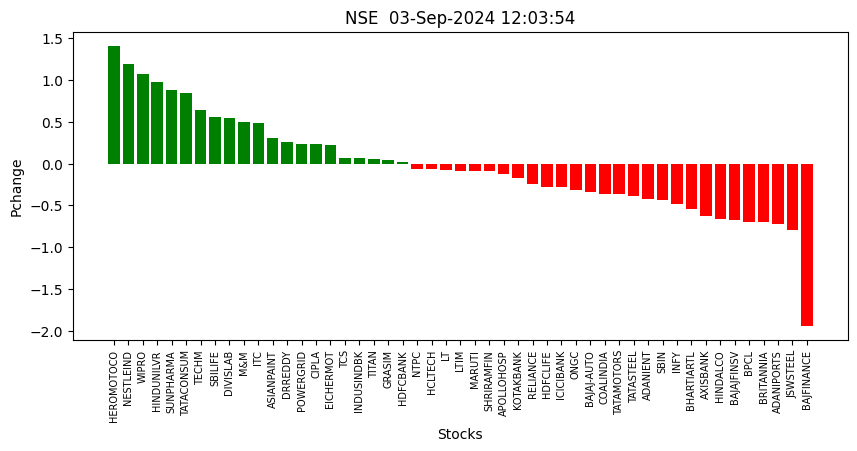

In [78]:
all_scraped_data = scrap_nifty()

Success


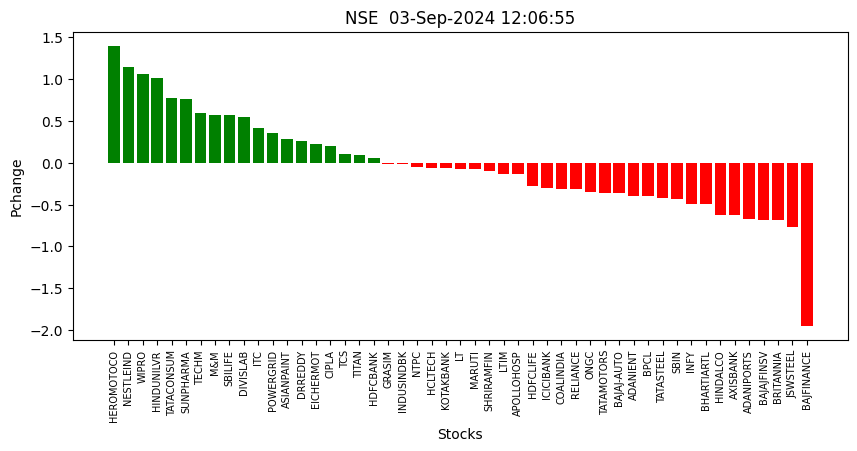

done
Success


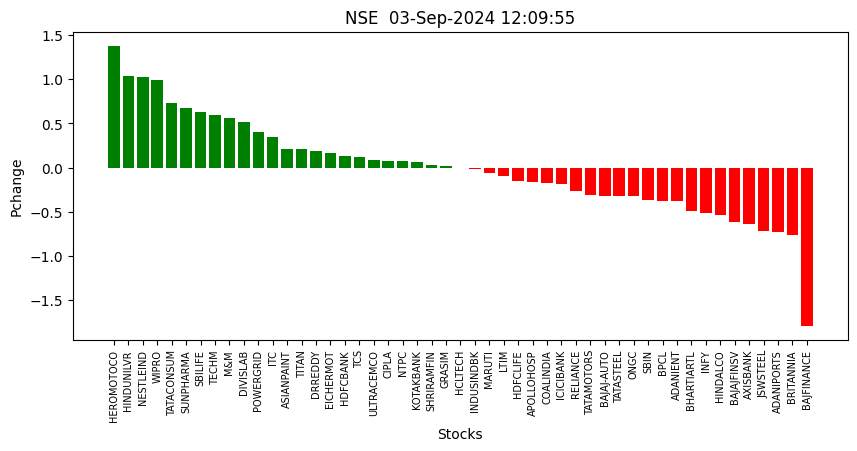

done


In [81]:
for i in range(2):
    all_scraped_data = pd.concat([all_scraped_data,scrap_nifty()],axis=0)
    time.sleep(180)
    print('done')

In [82]:
all_scraped_data

,lastUpdateTime,symbol,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,...,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow
1,03-Sep-2024 12:03:54,HEROMOTOCO,5602.00,5664.90,5549.90,5656.65,5578.20,78.45,1.41,7.344270e+11,...,5602.00,5664.90,5549.90,5655.00,5578.20,76.80,1.38,7.349469e+11,5894.55,2916.85
2,03-Sep-2024 12:03:53,NESTLEIND,2502.00,2546.90,2502.00,2539.80,2509.90,29.90,1.19,9.055620e+11,...,2780.00,2827.95,2775.00,2818.05,2789.05,29.00,1.04,2.515679e+12,2834.95,2172.05
3,03-Sep-2024 12:03:51,WIPRO,533.00,540.85,529.50,538.15,532.45,5.70,1.07,7.611840e+11,...,2502.00,2546.90,2502.00,2535.70,2509.90,25.80,1.03,9.052766e+11,2769.30,2163.25
4,03-Sep-2024 12:03:52,HINDUNILVR,2780.00,2827.95,2775.00,2816.00,2789.05,26.95,0.97,2.514206e+12,...,533.00,540.85,529.50,537.70,532.45,5.25,0.99,7.594891e+11,579.90,375.05
5,03-Sep-2024 12:03:54,SUNPHARMA,1820.00,1839.55,1816.95,1832.00,1815.95,16.05,0.88,1.978983e+12,...,1209.00,1218.35,1200.05,1208.50,1199.70,8.80,0.73,7.891582e+11,1256.44,828.71
6,03-Sep-2024 12:03:51,TATACONSUM,1209.00,1218.35,1200.05,1209.80,1199.70,10.10,0.84,7.898438e+11,...,1820.00,1839.55,1816.95,1828.20,1815.95,12.25,0.67,1.973693e+12,1839.55,1068.35
7,03-Sep-2024 12:03:53,TECHM,1639.00,1657.80,1632.10,1657.25,1646.65,10.60,0.64,1.053615e+12,...,1890.00,1905.95,1881.75,1900.70,1888.75,11.95,0.63,8.562137e+11,1905.95,1264.35
8,03-Sep-2024 12:03:54,SBILIFE,1890.00,1905.95,1881.75,1899.35,1888.75,10.60,0.56,8.564842e+11,...,1639.00,1657.80,1632.10,1656.60,1646.65,9.95,0.60,1.053584e+12,1665.00,1098.15
9,03-Sep-2024 12:03:54,DIVISLAB,5036.85,5083.40,5036.55,5064.40,5036.85,27.55,0.55,6.451778e+11,...,2780.00,2798.10,2772.60,2792.50,2777.00,15.50,0.56,2.708447e+12,3013.50,1450.00
10,03-Sep-2024 12:03:49,M&M,2780.00,2798.10,2772.60,2791.00,2777.00,14.00,0.50,2.708592e+12,...,5036.85,5083.40,5036.55,5063.00,5036.85,26.15,0.52,6.453499e+11,5132.95,3295.30


In [85]:
len(nifty_50.columns)

12

In [97]:
t1 = all_scraped_data.iloc[:,:12]
t2 = all_scraped_data.iloc[:,12:24]
t3 = all_scraped_data.iloc[:,24:]

In [103]:
final_data = pd.concat([t1,t2,t3],axis=0)

In [112]:
final_data.reset_index(inplace = True)

In [116]:
final_data.drop('index',axis=1,inplace=True)

In [117]:
final_data

,lastUpdateTime,symbol,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow
0,03-Sep-2024 12:03:54,HEROMOTOCO,5602.0,5664.90,5549.90,5656.65,5578.20,78.45,1.41,7.344270e+11,5894.55,2916.85
1,03-Sep-2024 12:03:53,NESTLEIND,2502.0,2546.90,2502.00,2539.80,2509.90,29.90,1.19,9.055620e+11,2769.30,2163.25
2,03-Sep-2024 12:03:51,WIPRO,533.0,540.85,529.50,538.15,532.45,5.70,1.07,7.611840e+11,579.90,375.05
3,03-Sep-2024 12:03:52,HINDUNILVR,2780.0,2827.95,2775.00,2816.00,2789.05,26.95,0.97,2.514206e+12,2834.95,2172.05
4,03-Sep-2024 12:03:54,SUNPHARMA,1820.0,1839.55,1816.95,1832.00,1815.95,16.05,0.88,1.978983e+12,1839.55,1068.35
...,...,...,...,...,...,...,...,...,...,...,...,...
145,03-Sep-2024 12:09:54,AXISBANK,1188.0,1190.65,1176.70,1181.25,1188.80,-7.55,-0.64,3.359927e+12,1339.65,951.40
146,03-Sep-2024 12:09:52,JSWSTEEL,937.1,941.55,931.05,933.65,940.45,-6.80,-0.72,8.903042e+11,968.90,723.00
147,03-Sep-2024 12:09:53,ADANIPORTS,1494.5,1498.10,1482.40,1483.60,1494.50,-10.90,-0.73,1.089920e+12,1621.40,754.50
148,03-Sep-2024 12:09:55,BRITANNIA,5933.0,5944.00,5875.00,5876.95,5922.15,-45.20,-0.76,6.935825e+11,6005.00,4347.70


In [122]:
heromoto = final_data[final_data['symbol'] == 'HEROMOTOCO']

In [129]:
heromoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lastUpdateTime  3 non-null      object 
 1   symbol          3 non-null      object 
 2   open            3 non-null      float64
 3   dayHigh         3 non-null      float64
 4   dayLow          3 non-null      float64
 5   lastPrice       3 non-null      float64
 6   previousClose   3 non-null      float64
 7   change          3 non-null      float64
 8   pChange         3 non-null      float64
 9   ffmc            3 non-null      float64
 10  yearHigh        3 non-null      float64
 11  yearLow         3 non-null      float64
dtypes: float64(10), object(2)
memory usage: 312.0+ bytes


In [131]:
heromoto['lastUpdateTime'] = pd.to_datetime(heromoto['lastUpdateTime'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16616\1511951990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heromoto['lastUpdateTime'] = pd.to_datetime(heromoto['lastUpdateTime'])


In [132]:
heromoto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lastUpdateTime  3 non-null      datetime64[ns]
 1   symbol          3 non-null      object        
 2   open            3 non-null      float64       
 3   dayHigh         3 non-null      float64       
 4   dayLow          3 non-null      float64       
 5   lastPrice       3 non-null      float64       
 6   previousClose   3 non-null      float64       
 7   change          3 non-null      float64       
 8   pChange         3 non-null      float64       
 9   ffmc            3 non-null      float64       
 10  yearHigh        3 non-null      float64       
 11  yearLow         3 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 312.0+ bytes


In [136]:
heromoto['time'] = heromoto['lastUpdateTime'].dt.time

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16616\3254284936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heromoto['time'] = heromoto['lastUpdateTime'].dt.time


In [137]:
heromoto

,lastUpdateTime,symbol,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow,time
0,2024-09-03 12:03:54,HEROMOTOCO,5602.0,5664.9,5549.9,5656.65,5578.2,78.45,1.41,7.344270e+11,5894.55,2916.85,12:03:54
50,2024-09-03 12:06:54,HEROMOTOCO,5602.0,5664.9,5549.9,5656.30,5578.2,78.10,1.40,7.350639e+11,5894.55,2916.85,12:06:54
100,2024-09-03 12:09:54,HEROMOTOCO,5602.0,5664.9,5549.9,5655.00,5578.2,76.80,1.38,7.349469e+11,5894.55,2916.85,12:09:54


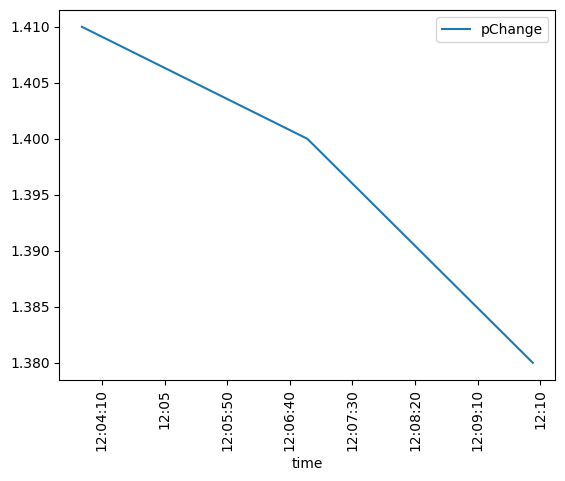

In [138]:
heromoto.plot(x = 'time',y = 'pChange')
plt.xticks(rotation=90)
plt.show()

Success


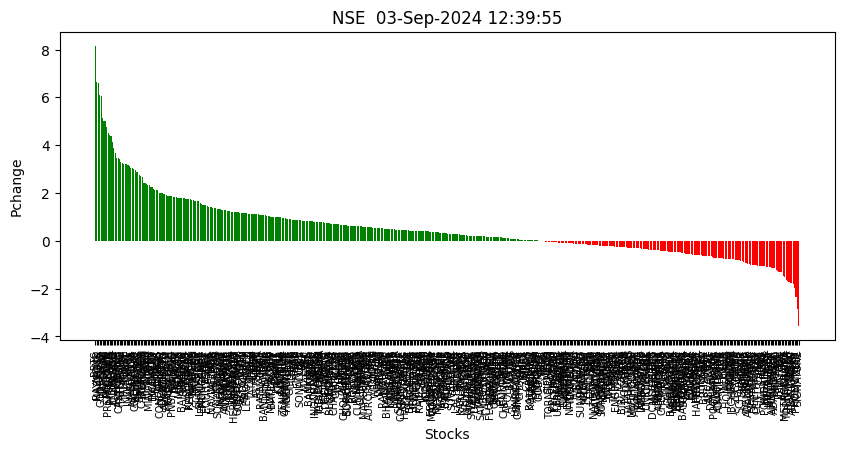

,lastUpdateTime,symbol,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow
1,03-Sep-2024 12:39:25,BBTC,2475.70,2705.00,2475.00,2658.9,2458.30,200.60,8.16,4.631110e+10,2705.00,980.10
2,03-Sep-2024 12:39:25,RAYMOND,2025.70,2182.00,2010.10,2140.9,2007.50,133.40,6.65,7.118396e+10,3496.00,1487.60
3,03-Sep-2024 12:39:25,MAZDOCK,4322.90,4561.15,4322.25,4477.0,4199.80,277.20,6.60,1.354540e+11,5860.00,1742.00
4,03-Sep-2024 12:39:21,QUESS,772.05,824.75,771.55,818.5,771.55,46.95,6.09,5.224884e+10,824.75,400.35
5,03-Sep-2024 12:39:22,GODREJIND,1061.65,1135.00,1061.65,1125.8,1061.65,64.15,6.04,7.196122e+10,1135.00,531.50


In [155]:
scrap_nifty().head()

In [144]:
0.08*17000

1360.0

In [149]:
nifty_50[nifty_50['ffmc'] == nifty_50['ffmc'].max()]

,lastUpdateTime,symbol,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,ffmc,yearHigh,yearLow
14,03-Sep-2024 11:37:53,HDFCBANK,1634.0,1634.0,1626.3,1630.35,1626.95,3.4,0.21,1.229011e+13,1794.0,1363.55


In [150]:
ff = 1247216

In [152]:
0.021 * ff

26191.536

In [153]:
26191/1360

19.258088235294117

In [154]:
8*20

160

In [1]:
def scrap_nifty():
    import requests as r
    import time
    from datetime import datetime
    import pandas as pd
    import json
    import matplotlib.pyplot as plt
    baseurl = "https://www.nseindia.com/"
    url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050'''
#     url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20MIDCAP%20100'''

#     url = '''https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20500'''

    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, '
                             'like Gecko) '
                             'Chrome/80.0.3987.149 Safari/537.36',
               'accept-language': 'en,gu;q=0.9,hi;q=0.8', 'accept-encoding': 'gzip, deflate, br'}


    session = r.Session()
    request_data = session.get(baseurl,headers=headers,timeout=5)
    cook = request_data.cookies
    r = session.get(url, headers=headers, timeout=5, cookies=cook)
    dict_data = r.json()

    if len(dict_data)>0:
        print('Success')
    else:
        print('Failed!!')
    
    
    all_data = pd.DataFrame(dict_data['data'])
    required_columns = ['lastUpdateTime','symbol', 'open', 'dayHigh', 'dayLow',
       'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh',
       'yearLow']
    
    nifty_50_data = all_data[required_columns]  
    nifty_50 = nifty_50_data.iloc[1:,:]
    positive_stocks = nifty_50[nifty_50['pChange']>0]
    negative_stocks = nifty_50[nifty_50['pChange']<0]
    
    plt.figure(figsize=(10,4))
    plt.bar(x = positive_stocks['symbol'],height=  positive_stocks['pChange'],color = 'g')
    plt.bar(x = negative_stocks['symbol'],height=  negative_stocks['pChange'],color = 'r')
    plt.title(f"NSE  {nifty_50['lastUpdateTime'].max()}")
    plt.xticks(rotation = 90,fontsize = 7)
    plt.xlabel('Stocks')
    plt.ylabel('Pchange')
    plt.show()
    
    
    return nifty_50

In [3]:
# scrap_nifty()

Success


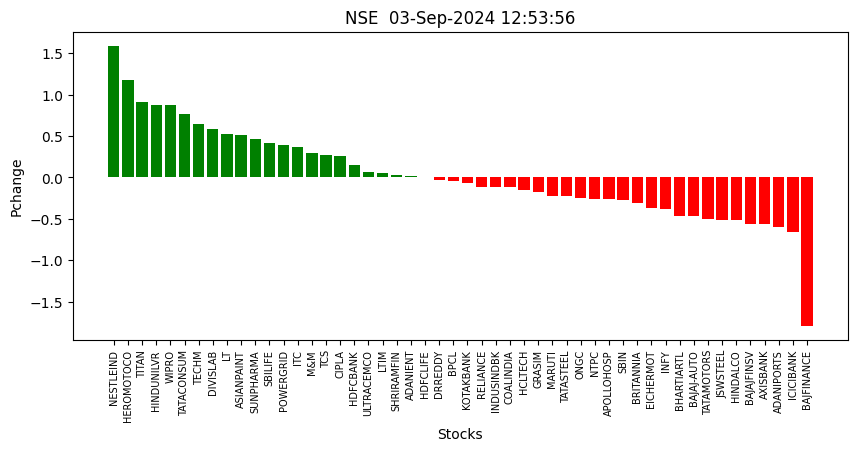

In [13]:
import time
from plyer import notification
notify_df = scrap_nifty().head(1)
msg = f"Best Stock Today {notify_df['symbol'].values[0]} pchange: {notify_df['pChange'].values[0]}"

if __name__=="__main__":
    time.sleep(2)
    notification.notify(title = "Nifty-50",message=msg ,timeout=2)

In [15]:
notification.notify(title = "Nifty-50",message=msg ,timeout=2)

Success


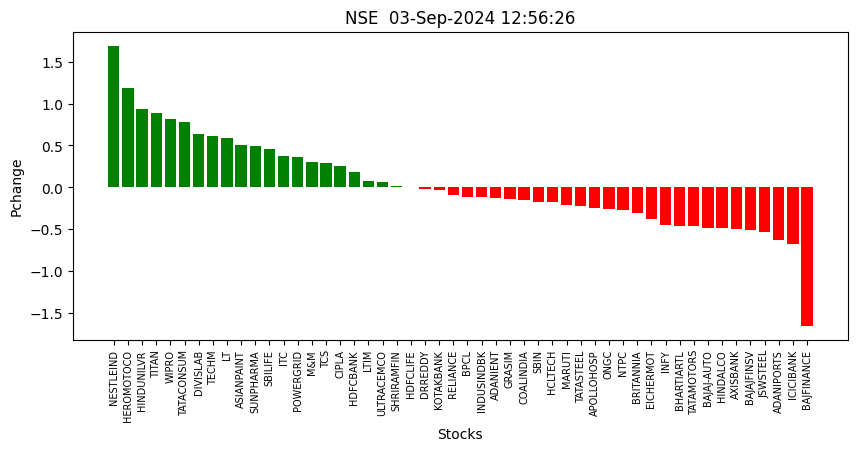

Success


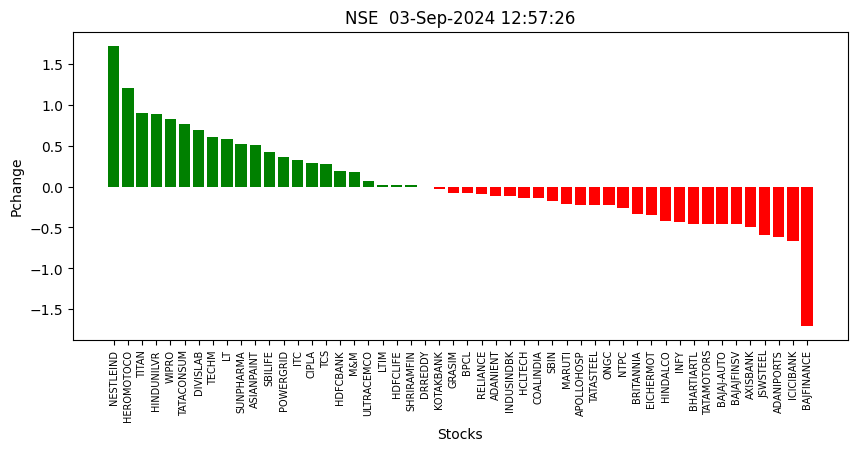

Success


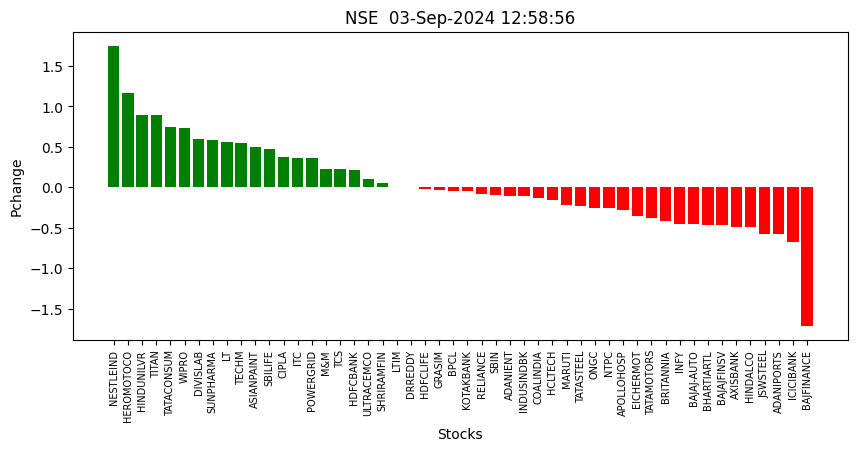

Success


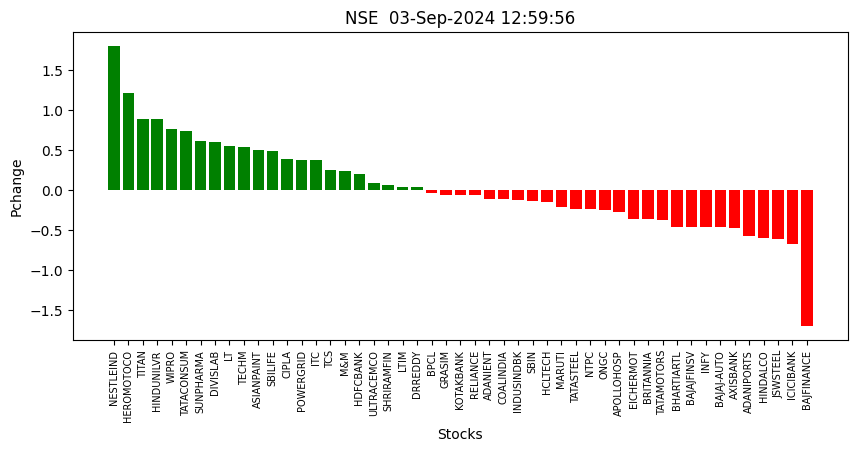

In [16]:
import time
from plyer import notification

for i in range(4):
    try:
        notify_df = scrap_nifty().head(1)
        msg = f"Best Stock Today {notify_df['symbol'].values[0]} pchange: {notify_df['pChange'].values[0]}"

        if __name__=="__main__":
            time.sleep(2)
            notification.notify(title = "Nifty-50",message=msg ,timeout=2)
        time.sleep(60)
    except:
        print('Error!!Error!!')
    